In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
from matplotlib import rcParams
import warnings 
warnings.filterwarnings("ignore")
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Selection
from scipy.stats import chi2_contingency
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
df.rename(columns={'Reached.on.Time_Y.N':'is_late'}, inplace=True)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,is_late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  is_late              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
# Categorical data
categorical = ['warehouse_block','mode_of_shipment','product_importance', 'gender', 'is_late', 'customer_rating']
# Numerical data
numeric = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms']

# Cleansing and FE

In [8]:
df_dt = df.copy()

In [9]:
# Select all duplicate rows based on all columns
df_dt[df_dt.duplicated(keep=False)] 

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,is_late


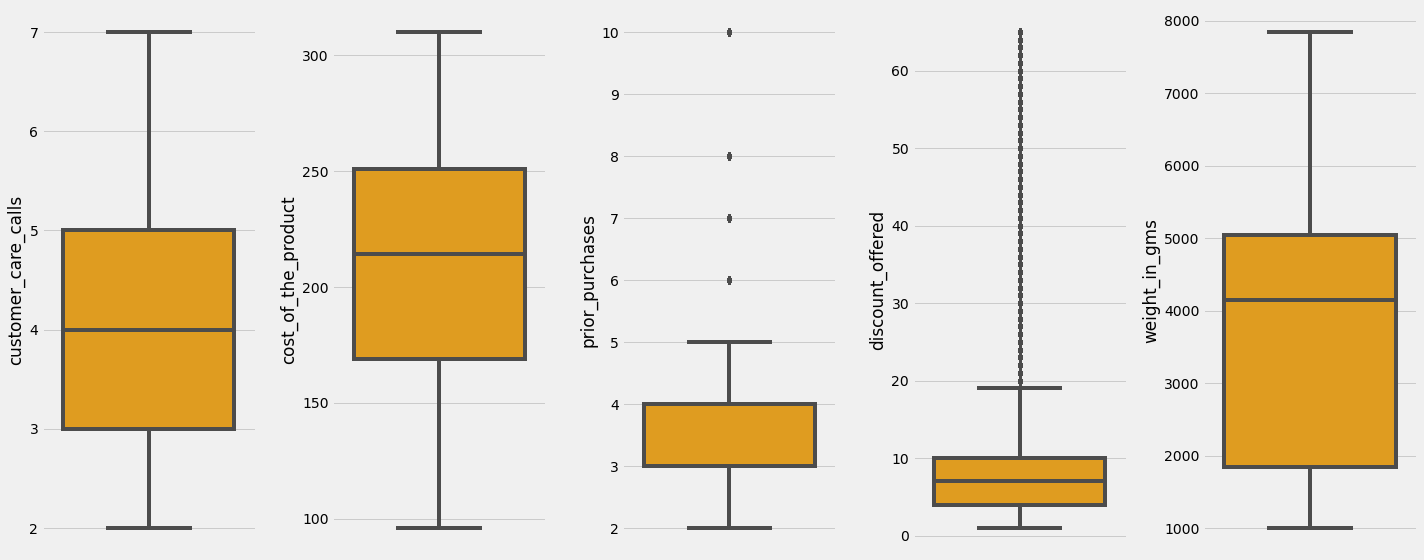

In [10]:
# Identify using boxplot
plt.figure(figsize=(20,8))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y=df_dt[numeric[i]], color='orange')
    plt.tight_layout()

In [11]:
# Identify outlier using IQR
for col in numeric:
    
    # Menghitung nilai IQR
    Q1 = df_dt[col].quantile(0.25)
    Q3 = df_dt[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define value 
    nilai_min = df_dt[col].min()
    nilai_max = df_dt[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)
    
    # Identify low outlier

    if (nilai_min < lower_lim):
        print('Low outlier is found in column',col,'<', lower_lim,'\n')
        #display total low outlier 
        print('Total of Low Outlier in column',col, ':', len(list(df_dt[df_dt[col] < lower_lim].index)),'\n')
    elif (nilai_max > upper_lim):
        print('High outlier is found in column',col,'>', upper_lim,'\n')
        #display total high outlier 
        print('Total of High Outlier in column',col, ':', len(list(df_dt[df_dt[col] > upper_lim].index)),'\n')
        
    else:
        print('Outlier is not found in column',col,'\n')

Outlier is not found in column customer_care_calls 

Outlier is not found in column cost_of_the_product 

High outlier is found in column prior_purchases > 5.5 

Total of High Outlier in column prior_purchases : 1003 

High outlier is found in column discount_offered > 19.0 

Total of High Outlier in column discount_offered : 2209 

Outlier is not found in column weight_in_gms 



found outliers in discount_offered & prior_purchases with almost 30% of data.

In [12]:
for col in ['prior_purchases', 'discount_offered']:
    # Initiate Q1
    Q1 = df_dt[col].quantile(0.25)
    # Initiate Q3
    Q3 = df_dt[col].quantile(0.75)
    # Initiate IQR
    IQR = Q3 - Q1
    # Initiate lower_bound & upper_bound 
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    # Filtering outlier & replace with upper_bound or lower_bound 
    df_dt[col] = np.where(df_dt[col] >= upper_bound,
                         upper_bound, df_dt[col])
    df_dt[col] = np.where(df_dt[col] <= lower_bound,
                         lower_bound, df_dt[col])

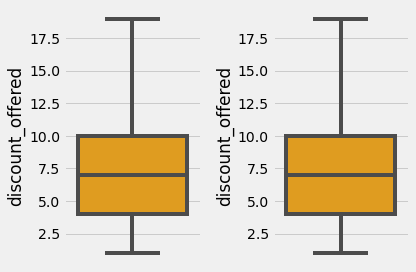

In [13]:
# Visualize after handle outlier
for i in range(0, len(['prior_purchases', 'discount_offered'])):
               plt.subplot(1,2, i+1)
               sns.boxplot(y= df_dt[col], color = 'orange', orient = 'v');
               plt.tight_layout();

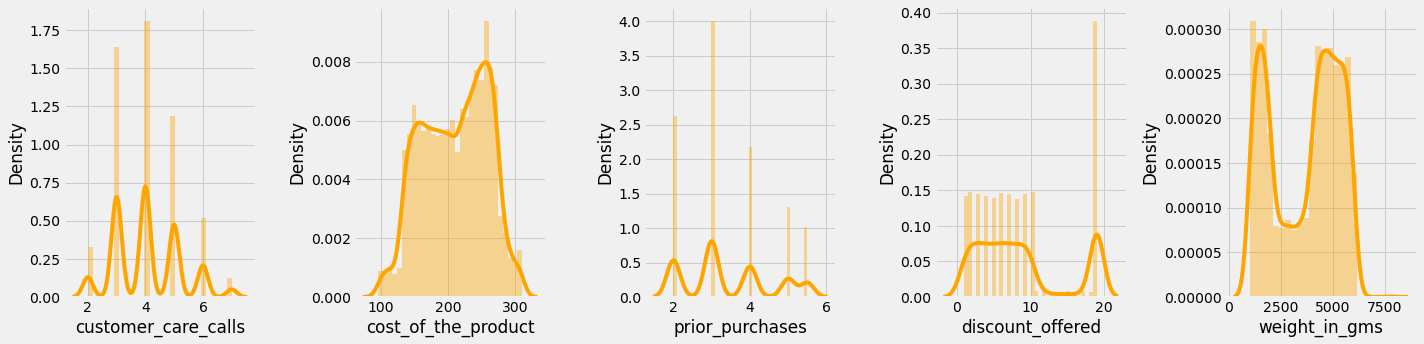

In [14]:
# Check data distribution
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_dt[numeric[i]], color='orange')
    plt.tight_layout()

In [15]:
# Apply log transformation
for col in numeric:
    df_dt[col] = (df_dt[col]+1).apply(np.log)

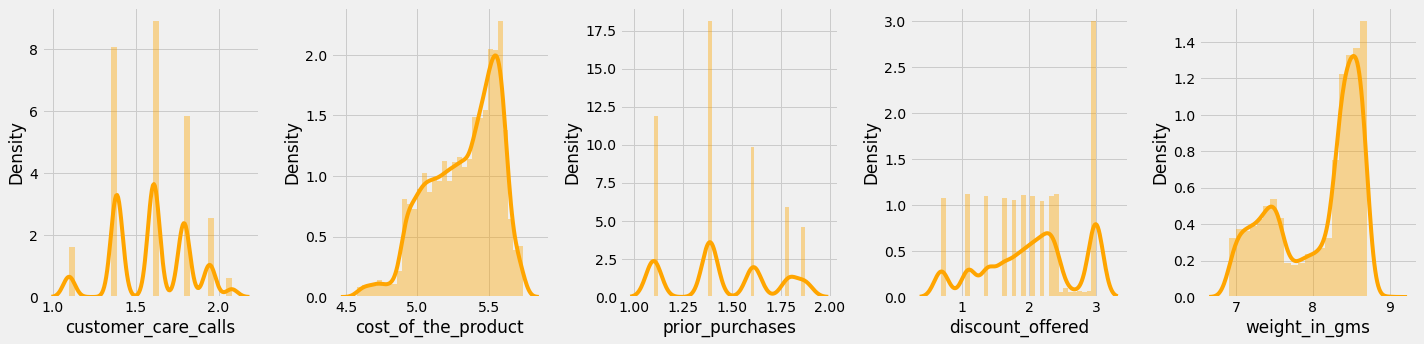

In [16]:
# Visualize after log transformation
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_dt[numeric[i]], color='orange')
    plt.tight_layout()

# Feature Selection = Chi Square

In [17]:
from scipy.stats import chi2_contingency

category = ['warehouse_block','mode_of_shipment','product_importance', 
            'gender','customer_rating']
chi2_check = []
# Iteration
for col in category:
    # If pvalue < 0.05 
    if chi2_contingency(pd.crosstab(df_dt['is_late'], df_dt[col]))[1] < 0.05 :
        chi2_check.append('Reject Null Hypothesis')
    # If pvalue > 0.05
    else :
        chi2_check.append('Fail to Reject Null Hypothesis')
        
# Make the result into dataframe
res = pd.DataFrame(data = [category, chi2_check]).T
# Rename columns
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,warehouse_block,Fail to Reject Null Hypothesis
1,mode_of_shipment,Fail to Reject Null Hypothesis
2,product_importance,Reject Null Hypothesis
3,gender,Fail to Reject Null Hypothesis
4,customer_rating,Fail to Reject Null Hypothesis


In [18]:
# Adjusted P-Value use the Bonferroni-adjusted method

# Initiate empty dictionary
check = {}
# Iteration for product_importance column
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    # One hot encoding product_importance column
    dummies = pd.get_dummies(df_dt[i])
    # Initiate Bonferroni-adjusted formula
    bon_p_value = 0.05/df_dt[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df_dt['is_late'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else :
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
# Make the result into dataframe
res_chi_ph = pd.DataFrame(data=[check.keys(), check.values()]).T
# Rename the columns
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,product_importance-high,Reject Null Hypothesis
1,product_importance-low,Fail to Reject Null Hypothesis
2,product_importance-medium,Fail to Reject Null Hypothesis


# One Hot Encoding

In [19]:
# one hot encoding feature product_importance and keep high category
onehots = pd.get_dummies(df_dt['product_importance'], prefix = 'product_importance')
df_dt = df_dt.join(onehots)
# drop all categorical columns & 'id, except product_importance_high
df_dt.drop(columns=['warehouse_block','gender','mode_of_shipment',
                   'product_importance', 'product_importance_low',
                   'product_importance_medium','id'], inplace = True)
# check dataframe after encoding
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_care_calls      10999 non-null  float64
 1   customer_rating          10999 non-null  int64  
 2   cost_of_the_product      10999 non-null  float64
 3   prior_purchases          10999 non-null  float64
 4   discount_offered         10999 non-null  float64
 5   weight_in_gms            10999 non-null  float64
 6   is_late                  10999 non-null  int64  
 7   product_importance_high  10999 non-null  uint8  
dtypes: float64(5), int64(2), uint8(1)
memory usage: 612.4 KB


In [22]:
df_eda = df.copy()

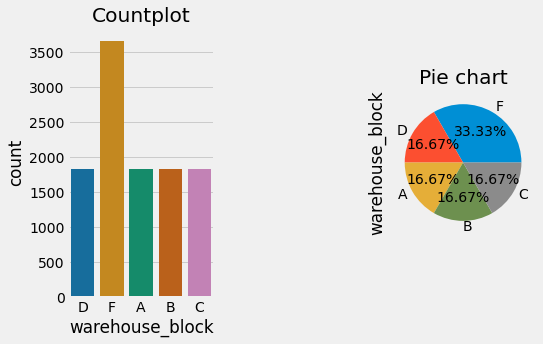

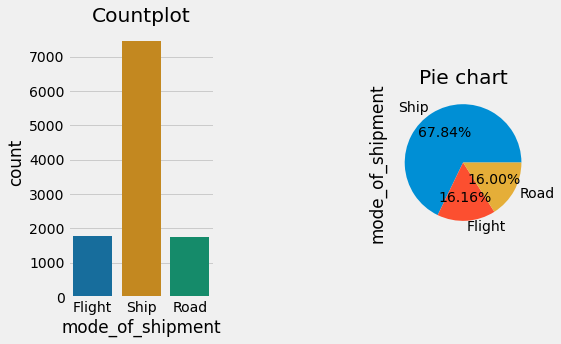

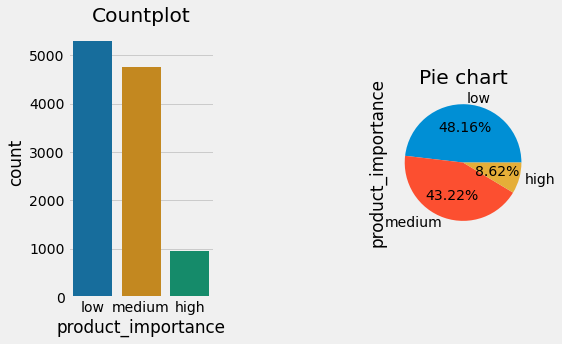

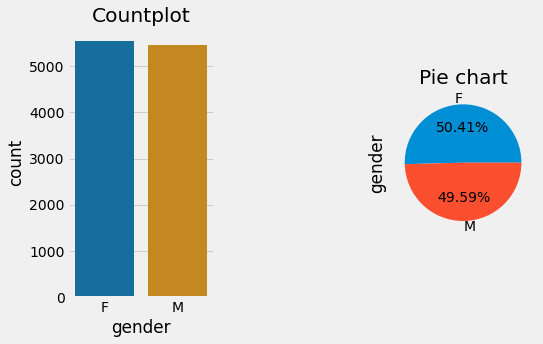

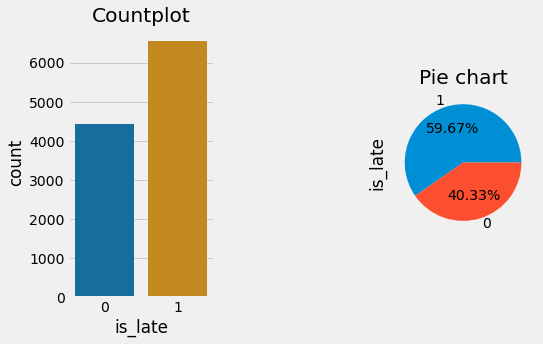

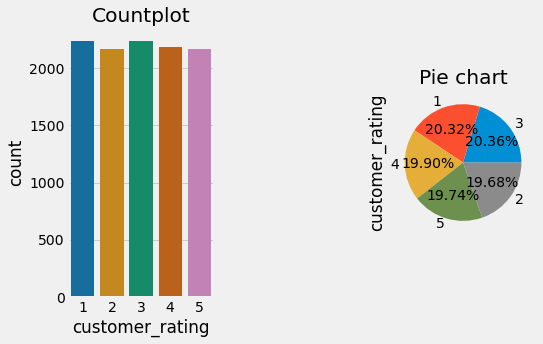

In [31]:
for col in categorical:
    plt.figure(figsize=(10, 5))
    
    plt.subplot(141);
    sns.countplot(df_eda[col], palette = 'colorblind', orient='v');
    plt.title('Countplot')
    plt.tight_layout();
    
    
    plt.subplot(143);
    df_eda[col].value_counts().plot.pie(autopct='%1.2f%%');
    plt.title('Pie chart') 

<Figure size 360x360 with 0 Axes>

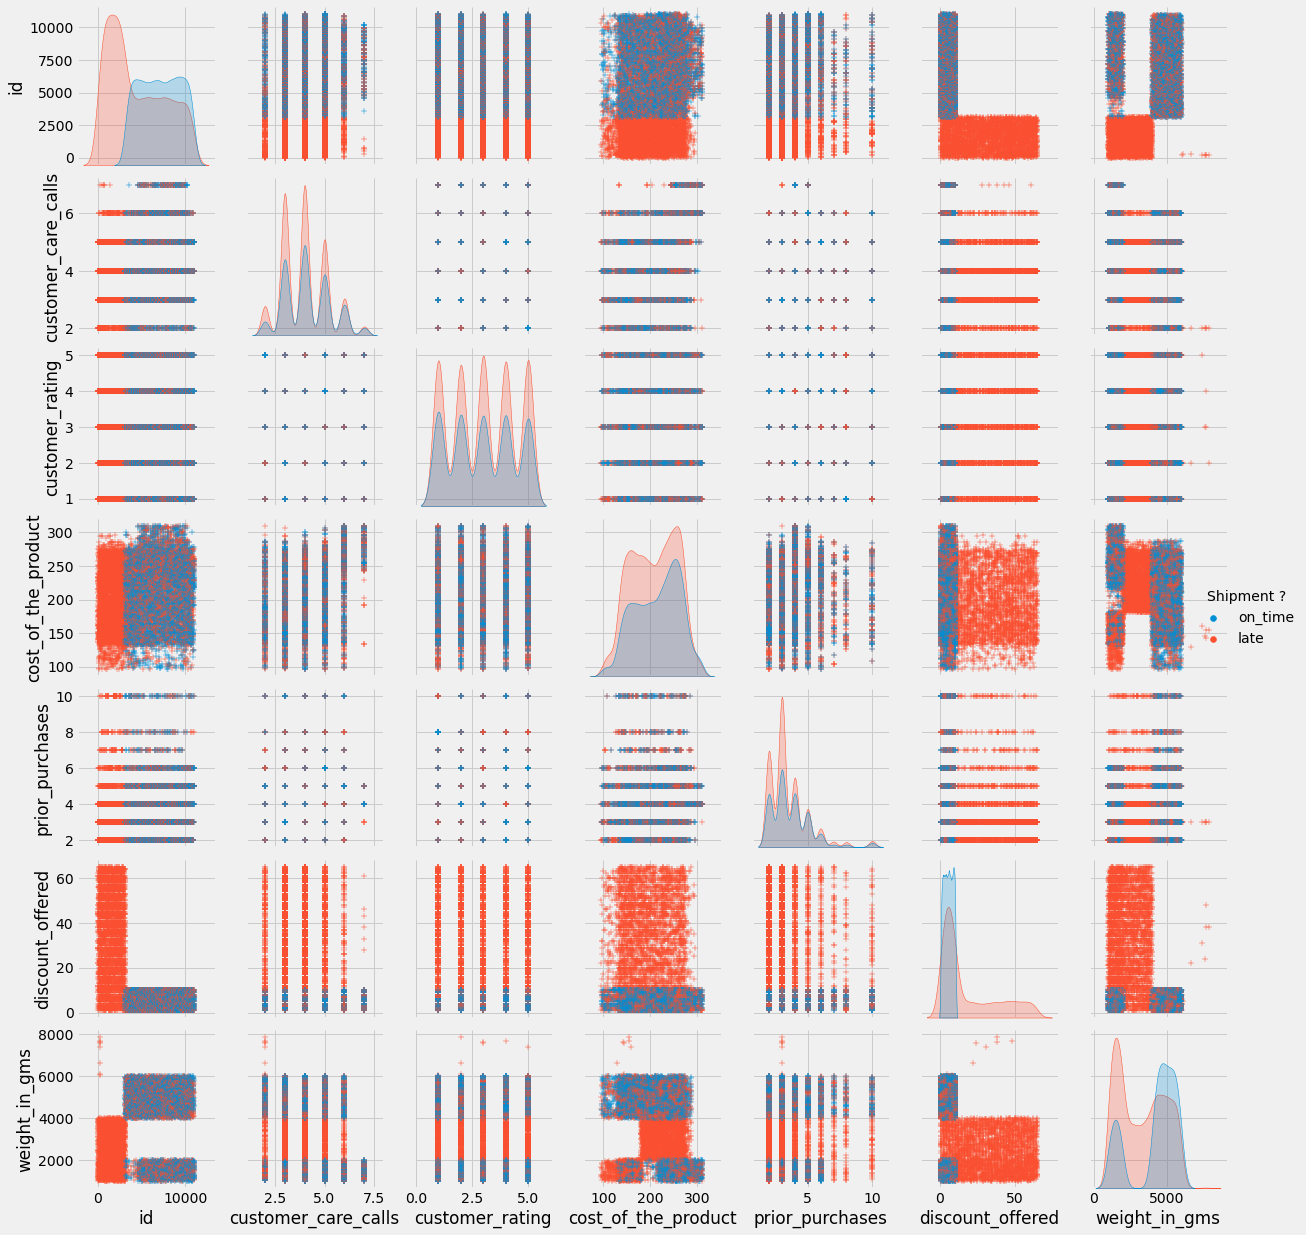

In [25]:
plt.figure(figsize=(5, 5));
p = sns.pairplot(df_eda, markers = '+', diag_kind = 'kde', hue = 'is_late');
# title
new_title = 'Shipment ?'
p._legend.set_title(new_title);

# replace labels
new_labels = ['on_time', 'late']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l);

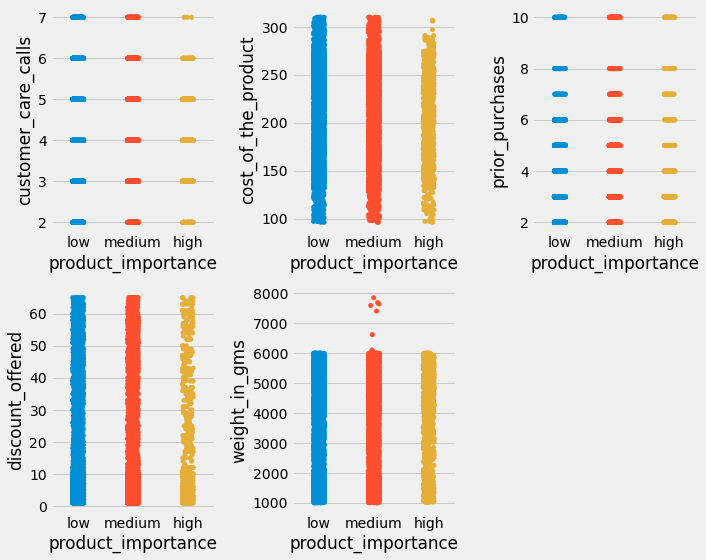

In [30]:
fig = plt.figure(figsize=(10, 8))
for i in range(0, len(numeric)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_eda, x='product_importance', y=numeric[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(numeric) + 1) # close figure 

# Categorical Data

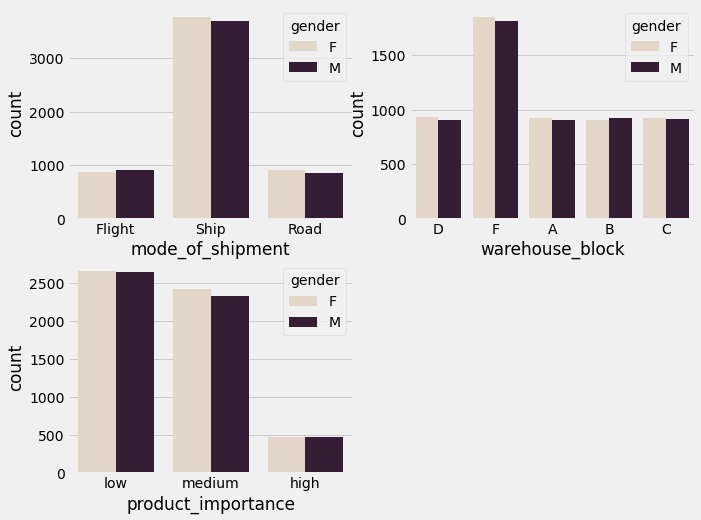

In [29]:
i=1
plt.figure(figsize=(10,8))
for col in ['mode_of_shipment', 'warehouse_block', 'product_importance']:
    plt.subplot(2,2,i)
    sns.countplot(df_eda[col], hue=df_eda['gender'], palette="ch:.25")
    i+=1

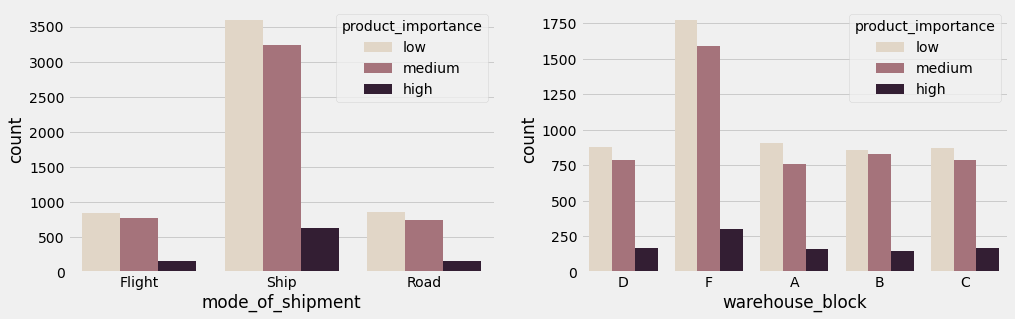

In [32]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block']:
    plt.subplot(2,2,i)
    sns.countplot(df_eda[col], hue=df_eda['product_importance'], palette="ch:.25")
    i+=1

Mostly high & low priority parcels used ship.

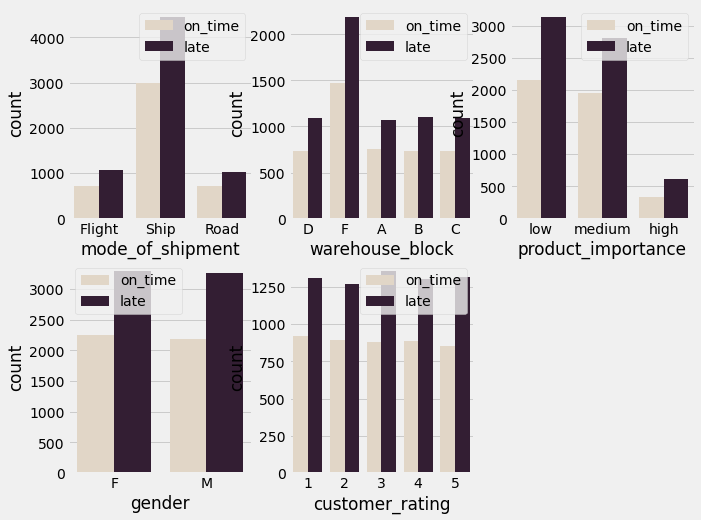

In [34]:
i=1
plt.figure(figsize=(10,8))
for col in ['mode_of_shipment', 'warehouse_block', 'product_importance',
            'gender','customer_rating']:
    plt.subplot(2,3,i)
    sns.countplot(df_eda[col], hue=df_eda['is_late'], palette="ch:.25")
    i+=1
    plt.legend(['on_time','late']);

# Machine Learning

In [35]:
# Inititate feature & target
X = df_dt.drop(columns = 'is_late')
y = df_dt['is_late']

In [36]:
# Split Train & Test Data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
# Create function to fit model & model evaluation
def fit_evaluation(Model, Xtrain, ytrain, Xtest, ytest):
    model = Model # initiate model
    model.fit(Xtrain, ytrain) # fit the model
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    train_score = model.score(Xtrain, ytrain) # Train Accuracy
    test_score = model.score(Xtest, ytest)    # Test Accuracy
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr) # AUC
    return round(train_score,2), round(test_score,2), round(precision_score(ytest, y_pred),2), \
           round(recall_score(ytrain, y_pred_train),2),round(recall_score(ytest, y_pred),2), \
           round(f1_score(ytest, y_pred),2), round(AUC,2)

In [42]:
# Inititate algorithm
import xgboost as xgb
from xgboost import XGBClassifier

lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric = 'logloss')

# Create function to make the result as dataframe 
def model_comparison_default(X,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr, Xtrain, ytrain, Xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt, Xtrain, ytrain, Xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf, Xtrain, ytrain, Xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn, Xtrain, ytrain, Xtest, ytest)
    # SVC
    svc_train_score, svc_test_score, svc_pr, svctr_re, svcte_re, svc_f1, svc_auc = fit_evaluation(
        svc, Xtrain, ytrain, Xtest, ytest)
    # XGBoost
    xgb_train_score, xgb_test_score, xgb_pr, xgbtr_re, xgbte_re, xgb_f1, xgb_auc = fit_evaluation(
        xgb, Xtrain, ytrain, Xtest, ytest)
    
    
    models = ['Logistic Regression','Decision Tree','Random Forest',
             'KNN','SVC','XGBoost']
    train_score = [lr_train_score, dt_train_score, rf_train_score, 
                   knn_train_score, svc_train_score, xgb_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score,
                  knn_test_score, svc_test_score, xgb_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr, svc_pr, xgb_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re, svctr_re, xgbtr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re, svcte_re, xgbte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc, svc_auc, xgb_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    
    return model_comparison

In [44]:
model_comparison_default(X,y)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall_Train,Recall_Test,F1 Score,AUC
0,Logistic Regression,0.63,0.63,0.67,0.75,0.75,0.71,0.6
1,Decision Tree,1.0,0.66,0.72,1.0,0.71,0.71,0.64
2,Random Forest,1.0,0.67,0.76,1.0,0.66,0.71,0.67
3,KNN,0.77,0.64,0.72,0.78,0.67,0.69,0.64
4,SVC,0.65,0.66,0.78,0.6,0.6,0.68,0.67
5,XGBoost,0.91,0.67,0.75,0.88,0.67,0.71,0.67


From the result above, only Logistic Regression and SVC which are neither overfitting nor underfiting. Logistic Regression has the highest recall. Let's see with tuned parameter.

- Decision Tree

In [45]:
# Hyperparameter lists to be tested
max_depth = list(range(1,10)) 
min_samples_split = list(range(5,10)) 
min_samples_leaf = list(range(5,15)) 
max_features = ['auto', 'sqrt', 'log2'] 
criterion = ['gini','entropy']
splitter = ['best','random']

# Initiate hyperparameters
hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter)

# Initiate model
dt_tun = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt_tun, hyperparameters, cv=10, scoring='recall',random_state=42) 
model.fit(Xtrain, ytrain)
y_pred_tun = model.predict(Xtest)
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=6,
                       random_state=42)

- Random Forest

In [46]:
# Initiate hyperparameters
params = {'max_depth':[50],'n_estimators':[100,150], 
          'criterion':['gini', 'entropy']}
# Initiate model
model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                     param_grid=params,scoring='recall', cv=5)
# Fit model
model.fit(Xtrain,ytrain)
y_pred = model.predict(Xtest)
# Get best estimator
model.best_estimator_

RandomForestClassifier(max_depth=50, random_state=42)

- KNN

In [47]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
KNN_2 = KNeighborsClassifier()

#Use RandomizedSearchCV
clf = RandomizedSearchCV(KNN_2, hyperparameters, cv=10, scoring = 'recall')

#Fit the model
best_model = clf.fit(X,y)
# Get best estimator
clf.best_estimator_

KNeighborsClassifier(leaf_size=41, n_neighbors=7, p=1)

- SVC

In [48]:
# Hyperparameter lists to be tested
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.0001, 0.001, 0.002] 
gamma = ['scale', 'auto']

#Convert to dictionary
hyperparameters = dict(kernel=kernel, C=C, gamma=gamma)

# Initiate model
svc = SVC(random_state=42) 
model = RandomizedSearchCV(svc, hyperparameters, cv=5, random_state=42, 
                           scoring='recall')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
model.best_estimator_

SVC(C=0.001, kernel='linear', random_state=42)

- XGBoost

In [49]:
# Hyper Parameter Optimization

hyperparameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}
# Initiate model
xg = XGBClassifier(random_state=42,eval_metric = 'logloss')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
y_pred = xg_tuned.predict(Xtest)#Check performa dari model
xg_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=15, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

In [50]:
# Inititate best estimator
lr_tune = LogisticRegression(C=0.0001, random_state=42)
dt_tune = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=6,
                       random_state=42)
rf_tune = RandomForestClassifier(max_depth=50, random_state=42)
knn_tune = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
svc_tune = SVC(C=0.0001, kernel='linear', random_state=42)
xgb_tune = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='logloss',
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

# Create function to make the result as dataframe 
def model_comparison_tuned(X,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr_tune, Xtrain, ytrain, Xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt_tune, Xtrain, ytrain, Xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf_tune, Xtrain, ytrain, Xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn_tune, Xtrain, ytrain, Xtest, ytest)
    # SVC
    svc_train_score, svc_test_score, svc_pr, svctr_re, svcte_re, svc_f1, svc_auc = fit_evaluation(
        svc_tune, Xtrain, ytrain, Xtest, ytest)
    # XGBoost
    xgb_train_score, xgb_test_score, xgb_pr, xgbtr_re, xgbte_re, xgb_f1, xgb_auc = fit_evaluation(
        xgb_tune, Xtrain, ytrain, Xtest, ytest)
    
    
    models = ['Logistic Regression','Decision Tree','Random Forest',
             'KNN','SVC','XGBoost']
    train_score = [lr_train_score, dt_train_score, rf_train_score, 
                   knn_train_score, svc_train_score, xgb_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score,
                  knn_test_score, svc_test_score, xgb_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr, svc_pr, xgb_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re, svctr_re, xgbtr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re, svcte_re, xgbte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc, svc_auc, xgb_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    
    return model_comparison

In [51]:
model_comparison_tuned(X,y)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall_Train,Recall_Test,F1 Score,AUC
0,Logistic Regression,0.59,0.6,0.6,1.0,1.0,0.75,0.5
1,Decision Tree,0.67,0.68,0.8,0.62,0.62,0.7,0.69
2,Random Forest,1.0,0.67,0.76,1.0,0.66,0.71,0.67
3,KNN,1.0,0.65,0.72,1.0,0.7,0.71,0.64
4,SVC,0.59,0.6,0.6,1.0,1.0,0.75,0.5
5,XGBoost,0.93,0.66,0.75,0.92,0.67,0.71,0.66


Decision Tree algorithm with hyper-parameter tuning has a good balance between its score, also neither underfitting nor overfitting.

# Confusion Matrix

In [52]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(Model, Xtrain, ytrain, Xtest, ytest):
    model = Model
    plot_confusion_matrix(model.fit(Xtrain, ytrain), Xtest, ytest,
                     display_labels=['on_time','late'], cmap = 'Oranges', 
                     values_format='.0f')  
    plt.grid(False)
    plt.show()  

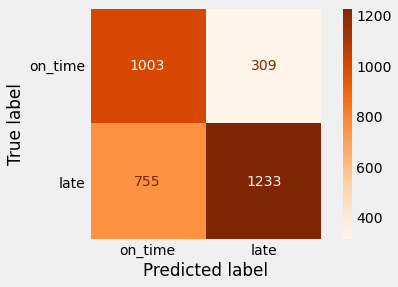

In [53]:
# After hyperparameter tuning
confusion_matrix(dt_tune, Xtrain, ytrain, Xtest, ytest)

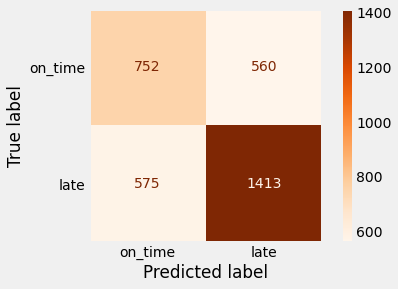

In [54]:
# Before hyperparameter tuning
confusion_matrix(dt, Xtrain, ytrain, Xtest, ytest)

- Feature Importance

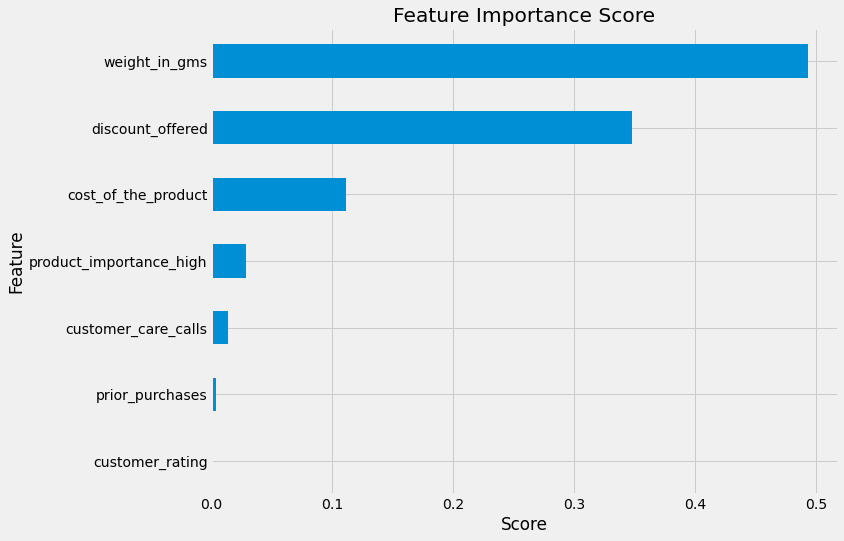

In [55]:
feat_importances = pd.Series(dt_tune.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score');
plt.ylabel('Feature');
plt.title('Feature Importance Score');